In [6]:
# load data from pycaret repo
import pandas as pd
data = pd.read_csv('../data/50901statsFull34.csv', sep=';') 
data = data.drop(columns=['txId', 'FeatureID'])
data = data.astype({'LeftSieFirst':'float','LeftSieLst':'float', 'RightSieFirst':'float', 'RightSieLst':'float', 'Length':'float'})
data.loc[data["ViolatedRule"] == 50901, "ViolatedRule"] = 1
data.loc[data["ViolatedRule"] == -1, "ViolatedRule"] = 0
data['left_diff'] = abs(data['LeftSieFirst'] - data['LeftSieLst'])
data['right_diff'] = abs(data['RightSieFirst'] - data['RightSieLst'])
data['left_dens'] = data['left_diff'] / data['Length']
data['right_dens'] = data['right_diff'] / data['Length']

data

,LeftSieFirst,LeftSieLst,RightSieFirst,RightSieLst,Length,ViolatedRule,left_diff,right_diff,left_dens,right_dens
0,1339.0,13399.0,13200.0,13398.0,8403.591673,1,12060.0,198.0,1.435101,0.023561
1,3199.0,3001.0,3198.0,482.0,8755.485138,1,198.0,2716.0,0.022614,0.310206
2,1323.0,13399.0,13200.0,13398.0,8403.591673,1,12076.0,198.0,1.437005,0.023561
3,14780.0,2684.0,2699.0,2685.0,6093.670449,1,12096.0,14.0,1.985011,0.002297
4,3199.0,3001.0,3198.0,478.0,8755.485138,1,198.0,2720.0,0.022614,0.310662
...,...,...,...,...,...,...,...,...,...,...
1649,9198.0,8800.0,9199.0,8801.0,48673.493560,0,398.0,398.0,0.008177,0.008177
1650,1701.0,1725.0,1700.0,1784.0,6487.116752,0,24.0,84.0,0.003700,0.012949
1651,NaN,NaN,23.0,99.0,9839.489420,0,NaN,76.0,NaN,0.007724
1652,3401.0,3499.0,NaN,NaN,20607.411560,0,98.0,NaN,0.004756,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LeftSieFirst   1470 non-null   float64
 1   LeftSieLst     1470 non-null   float64
 2   RightSieFirst  1421 non-null   float64
 3   RightSieLst    1421 non-null   float64
 4   Length         1654 non-null   float64
 5   ViolatedRule   1654 non-null   int64  
 6   left_diff      1470 non-null   float64
 7   right_diff     1421 non-null   float64
 8   left_dens      1470 non-null   float64
 9   right_dens     1421 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 129.3 KB


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LeftSieFirst,1470.0,8458.568027,62337.445606,1.000000,101.000000,790.500000,4698.000000,1.115999e+06
LeftSieLst,1470.0,9383.331973,62445.631611,1.000000,199.000000,1215.000000,6329.250000,1.115925e+06
RightSieFirst,1421.0,8677.372977,68488.409125,1.000000,114.000000,1002.000000,5460.000000,1.145787e+06
RightSieLst,1421.0,9773.147080,70927.692265,1.000000,199.000000,1398.000000,6301.000000,1.145787e+06
Length,1654.0,16212.325978,22416.752282,347.086445,5027.055071,10333.024730,18335.610560,4.007176e+05
ViolatedRule,1654.0,0.462515,0.498744,0.000000,0.000000,0.000000,1.000000,1.000000e+00
left_diff,1470.0,2000.497279,5915.333491,0.000000,20.000000,98.000000,1184.000000,9.999800e+04
right_diff,1421.0,3110.096411,20143.744758,0.000000,34.000000,98.000000,1920.000000,6.841060e+05
left_dens,1470.0,0.303125,1.401085,0.000000,0.001957,0.008224,0.222926,3.220587e+01
right_dens,1421.0,0.383820,2.380179,0.000000,0.002595,0.010443,0.295015,6.340906e+01


In [9]:
data.ViolatedRule.value_counts()

0    889
1    765
Name: ViolatedRule, dtype: int64

In [10]:
import sweetviz as sv
# from pandas_profiling import ProfileReport
config = sv.FeatureConfig( force_num=['ViolatedRule']) # skip=["proline", "magnesium"],
my_report = sv.analyze(data,feat_cfg=config,target_feat ='ViolatedRule')
my_report.show_html()
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile.to_file(output_file=pathlib.Path("./data_report.html"))
#profile.to_widgets()

/usr/local/lib/python3.8/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.8/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.8/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.8/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.8/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.8/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, yo

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
#from pycaret.classification import *
from pycaret.classification import *
s = setup(data, target = 'ViolatedRule', silent = True, log_experiment = True, experiment_name = 'first_rule')
#feature_interaction = True, feature_ratio = True,          fix_imbalance=True

,Description,Value
0,session_id,7988
1,Target,ViolatedRule
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1654, 10)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


2022/11/10 10:37:45 INFO mlflow.tracking.fluent: Experiment with name 'first_rule' does not exist. Creating a new experiment.


In [12]:
# compare baseline models
best = compare_models(turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9948,0.9975,0.9963,0.9927,0.9944,0.9896,0.9897,0.0390
xgboost,Extreme Gradient Boosting,0.9931,0.9990,0.9925,0.9927,0.9925,0.9861,0.9863,0.0250
lightgbm,Light Gradient Boosting Machine,0.9922,0.9988,0.9925,0.9907,0.9916,0.9843,0.9844,0.1090
catboost,CatBoost Classifier,0.9905,0.9991,0.9888,0.9908,0.9897,0.9809,0.9810,3.8560
rf,Random Forest Classifier,0.9905,0.9987,0.9887,0.9908,0.9896,0.9808,0.9810,0.0680
et,Extra Trees Classifier,0.9888,0.9994,0.9963,0.9801,0.9880,0.9774,0.9777,0.0560
ada,Ada Boost Classifier,0.9870,0.9946,0.9850,0.9871,0.9859,0.9739,0.9741,0.0230
dt,Decision Tree Classifier,0.9845,0.9845,0.9850,0.9819,0.9833,0.9688,0.9691,0.0040
knn,K Neighbors Classifier,0.9507,0.9829,0.9066,0.9861,0.9445,0.9003,0.9032,0.2490
mlp,MLP Classifier,0.9412,0.9635,0.9255,0.9476,0.9358,0.8816,0.8829,0.0430


In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [14]:
# top3 = compare_models(n_select = 3)
# tuned_top3 = [tune_model(i) for i in top3]
# blender = blend_models(tuned_top3)
# stacker = stack_models(tuned_top3)
# best_auc_model = automl(optimize = 'AUC')

In [15]:
investigated = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9828,0.9934,1.0000,0.9636,0.9815,0.9654,0.9659
1,0.9914,0.9970,1.0000,0.9818,0.9908,0.9827,0.9828
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9914,0.9997,0.9815,1.0000,0.9907,0.9827,0.9828
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9914,1.0000,0.9815,1.0000,0.9907,0.9827,0.9828
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9826,1.0000,0.9623,1.0000,0.9808,0.9649,0.9655
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [16]:
print(investigated)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)


In [17]:
tuned_investigated = tune_model(investigated, choose_better=True, n_iter = 10, search_library = 'optuna', search_algorithm = 'tpe')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9741,0.9946,0.9811,0.9630,0.9720,0.9480,0.9481
1,0.9828,0.9991,0.9815,0.9815,0.9815,0.9654,0.9654
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9914,0.9988,0.9815,1.0000,0.9907,0.9827,0.9828
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9913,0.9991,0.9811,1.0000,0.9905,0.9825,0.9826


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


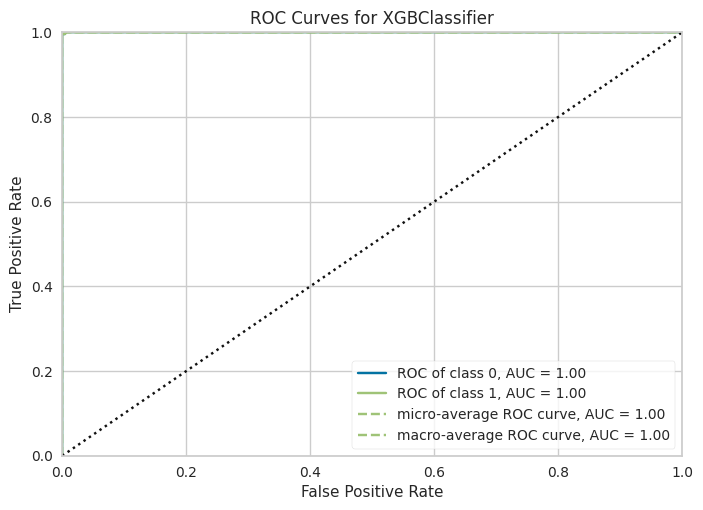

In [18]:
plot_model(tuned_investigated, plot = 'auc')

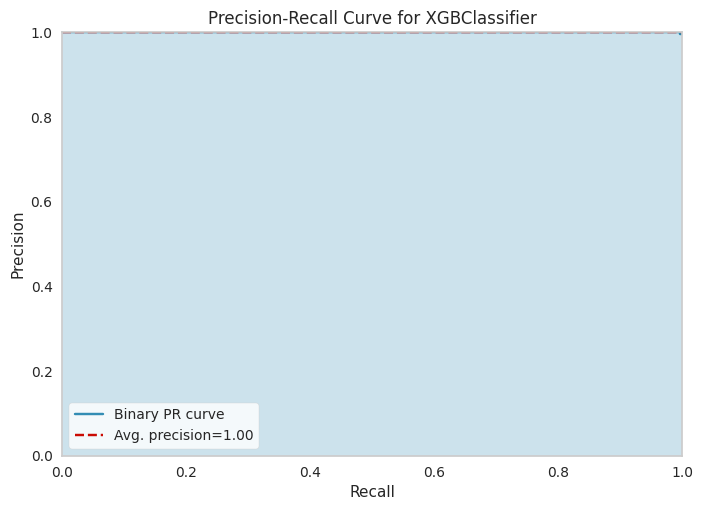

In [19]:
plot_model(tuned_investigated, plot = 'pr')

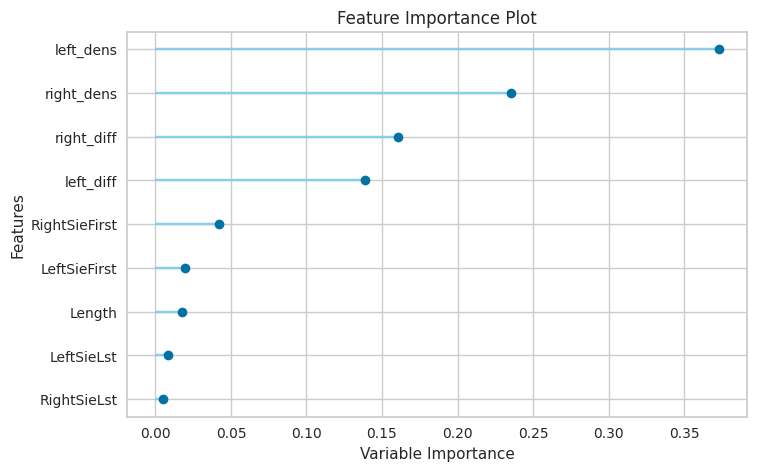

In [20]:
plot_model(tuned_investigated, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


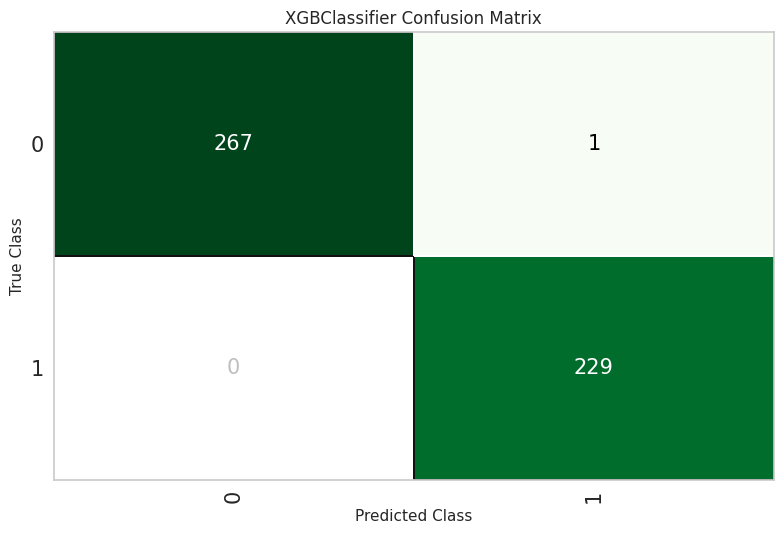

In [21]:
plot_model(tuned_investigated, plot = 'confusion_matrix')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


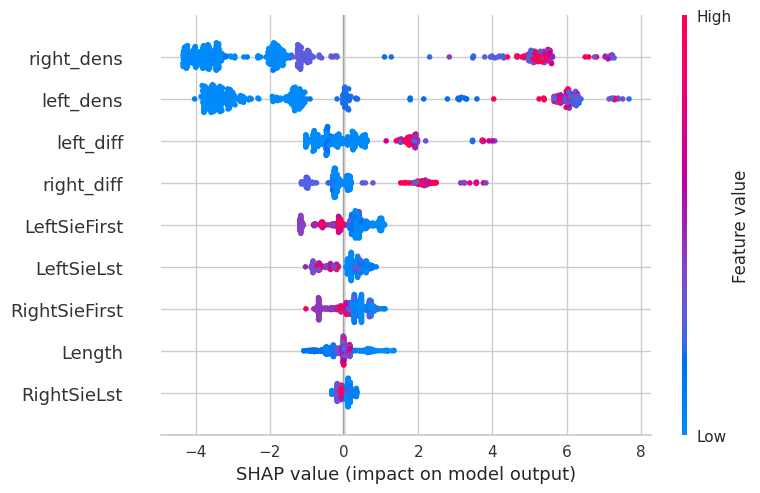

In [22]:
interpret_model(tuned_investigated)

In [23]:
deep_check(tuned_investigated)

/usr/local/lib/python3.8/site-packages/deepchecks/__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead

/usr/local/lib/python3.8/site-packages/deepchecks/suites.py:21: DeprecationWarning:

Ability to import tabular suites from the `deepchecks.suites` is deprecated, please import from `deepchecks.tabular.suites` instead



Full Suite: 
 
 
 
 35/35 [Time: 00:08, Check=Identifier Label Correlation]

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_M05CKQ4QIKHVR7E2HQSOHJPT9">Full S…

In [24]:
evaluate_model(tuned_investigated)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
predict_model(tuned_investigated)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9980,1.0000,1.0000,0.9957,0.9978,0.9960,0.9960


,LeftSieFirst,LeftSieLst,RightSieFirst,RightSieLst,Length,left_diff,right_diff,left_dens,right_dens,ViolatedRule,Label,Score
0,8880.0,8670.0,8751.0,10921.0,39789.070312,210.0,2170.0,0.005278,0.054538,0,0,0.9995
1,7801.0,7885.0,7800.0,7886.0,9759.462891,84.0,86.0,0.008607,0.008812,0,0,0.9998
2,2313.0,2313.0,2244.0,2244.0,38567.277344,0.0,0.0,0.000000,0.000000,0,0,0.9994
3,109.0,199.0,658.0,6920.0,1802.536255,90.0,6262.0,0.049930,3.473994,1,1,0.9995
4,6998.0,6904.0,6999.0,6903.0,25353.617188,94.0,96.0,0.003708,0.003786,0,0,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...
492,100.0,166.0,101.0,167.0,5033.486328,66.0,66.0,0.013112,0.013112,0,0,0.9996
493,777.0,601.0,776.0,600.0,26616.562500,176.0,176.0,0.006612,0.006612,0,0,0.9988
494,51.0,53.0,46.0,46.0,1618.432861,2.0,0.0,0.001236,0.000000,0,0,0.9991
495,3890.0,3700.0,3891.0,3407.0,101798.382812,190.0,484.0,0.001866,0.004754,0,0,0.9993


In [26]:
final_rf = finalize_model(tuned_investigated)